In [141]:
#Load required libraries

import pandas as pd
import numpy as np
import pyleoclim as pyleo
import matplotlib.pyplot as plt

In [143]:
#Load all the datasets

#Antarctic circumpolar current strength
acc_path = "/Users/pranaykt/Library/CloudStorage/OneDrive-UniversityofDelaware-o365/Documents/PhD/Workshops/pyRATES/Lamy-etal_2024/datasets/383-U1540_ACC.csv"
acc = pd.read_csv(acc_path)


#Antarctic ice volume
ice_path = "/Users/pranaykt/Library/CloudStorage/OneDrive-UniversityofDelaware-o365/Documents/PhD/Workshops/pyRATES/Data/AntarcticIceVolume.csv"
ice = pd.read_csv(ice_path)


#Asian Monsoon
monsoon_path = "/Users/pranaykt/Library/CloudStorage/OneDrive-UniversityofDelaware-o365/Documents/PhD/Workshops/pyRATES/Data/AsianMonsoonsun2010lingtai.csv"
monsoon = pd.read_csv(monsoon_path)


#Load LR04
lro4 = pyleo.utils.load_dataset('LR04')



#Eccentricity
ecc_path = "/Users/pranaykt/Library/CloudStorage/OneDrive-UniversityofDelaware-o365/Documents/PhD/Workshops/pyRATES/Data/ecc.csv"
ecc = pd.read_csv(ecc_path)


#Load d13c
d13c = pyleo.utils.load_dataset('cenogrid_d13C')
d13c = d13c.convert_time_unit('Ky')
d13c = d13c.sel(time=slice(0,5400))

Time axis values sorted in ascending order
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [Ky BP]', ylabel='Eccentricity'>)

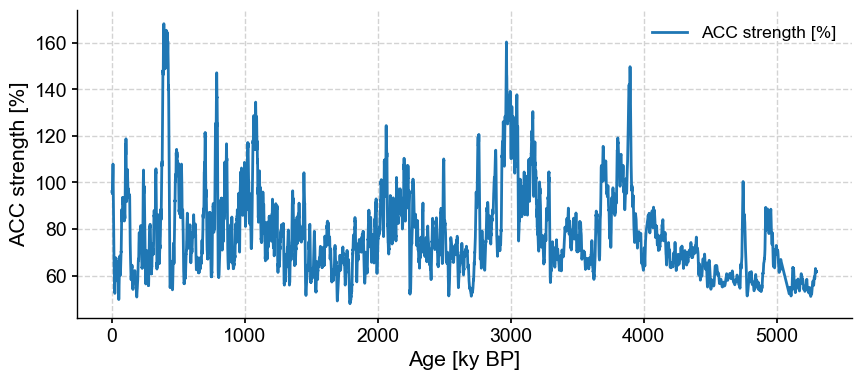

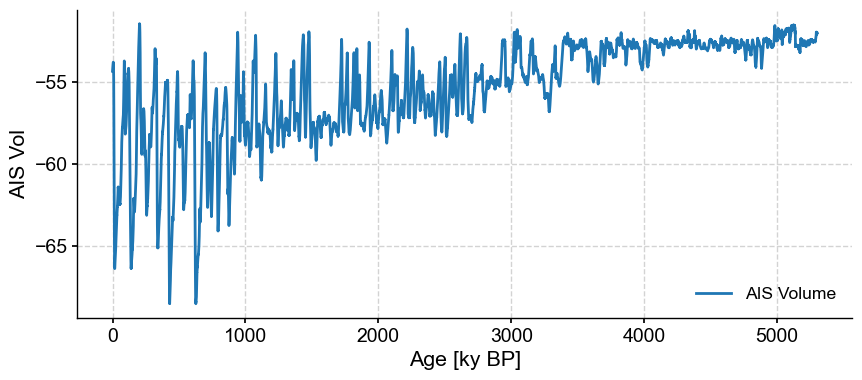

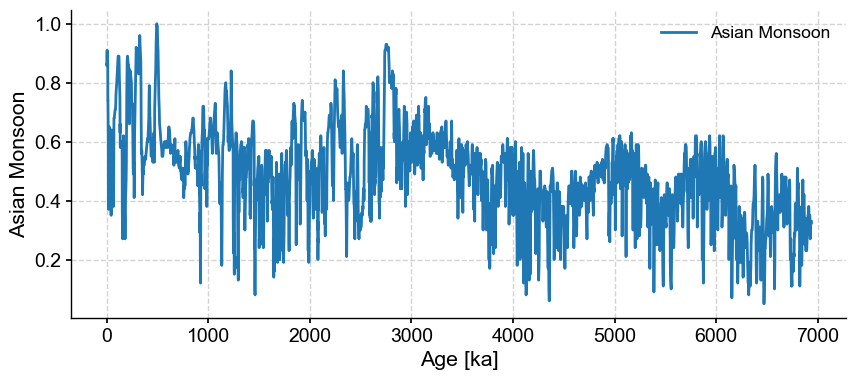

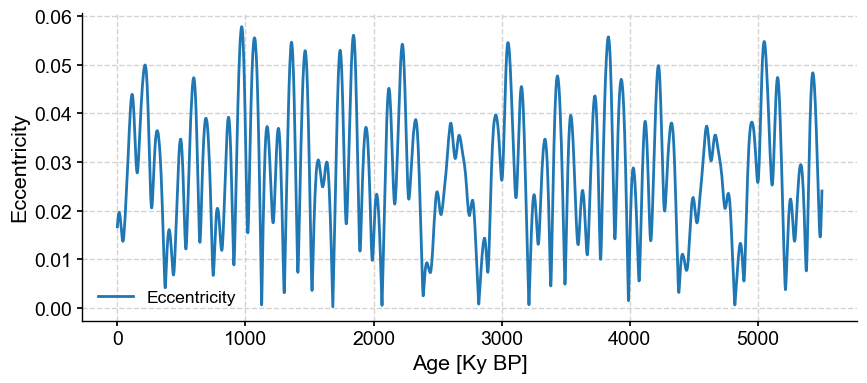

In [144]:
#Create a Pyleo series from pandas dataframe
#ACC
acc_ts = pyleo.Series(time=acc['Age [ka BP]'], value=acc['ACC strength [%]'], time_name='Age',
                     time_unit='ky BP', value_name='ACC strength', value_unit='%', label='ACC strength [%]')

#acc_ts = acc_ts.resample('5ka').mean()
acc_ts.plot()

#Antarctic Ice volume
ice_ts = pyleo.Series(time=ice['%% Time (ka)'], value=ice['AIS-sc'], time_name='Age',
                     time_unit='ky BP', value_name='AIS Vol', label='AIS Volume')

#ice_ts = ice_ts.resample('5ka').mean()
ice_ts.plot()


#Asian Monsoon
monsoon_ts = pyleo.Series(time=monsoon['Age Ma (New)'], value=monsoon['Summer monsoon stack'], time_name='Age',
                     time_unit='My BP', value_name='Asian Monsoon', label='Asian Monsoon')

monsoon_ts = monsoon_ts.convert_time_unit('Ky')
#monsoon_ts = monsoon_ts.resample('5ka').mean()
monsoon_ts.plot()


#Ecc
ecc_ts = pyleo.Series(time=ecc['Age[Ka]'], value=ecc['Eccentricity'], time_name='Age',
                     time_unit='Ky BP', value_name='Eccentricity', label='Eccentricity')

ecc_ts = ecc_ts.sel(time=slice(0,5500))
ecc_ts.plot()

filtering with windown hamming


Performing spectral analysis on individual series: 100%|████████████████████████████████| 200/200 [16:14<00:00,  4.87s/it]


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [ky]', ylabel='PSD'>)

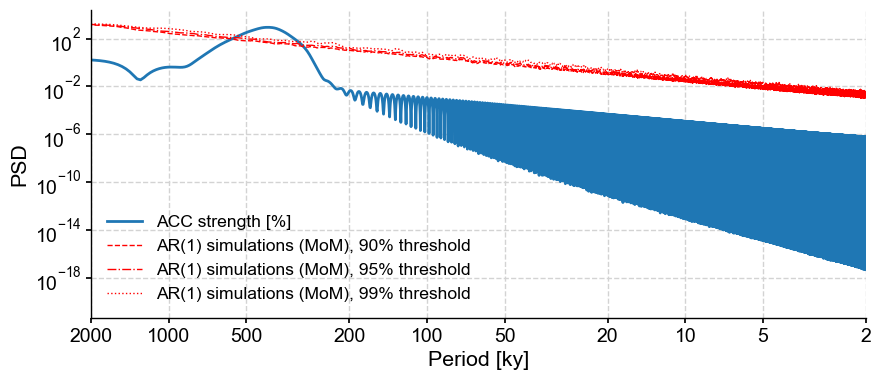

In [148]:

#Spectral Analysis of ACC Strength (filtered for 413kyr cyclicity)
acc_ts.gaussianize().filter(cutoff_scale=(390,420),method='firwin').spectral().signif_test(qs=[0.90,0.95,0.99]).plot()

filtering with windown hamming


Performing wavelet analysis on individual series: 100%|█████████████████████████████████| 200/200 [01:03<00:00,  3.13it/s]


(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': 'ACC strength [%] scalogram (CWT) with 95% threshold'}, xlabel='Age [ky BP]', ylabel='Scale [kyrs]'>)

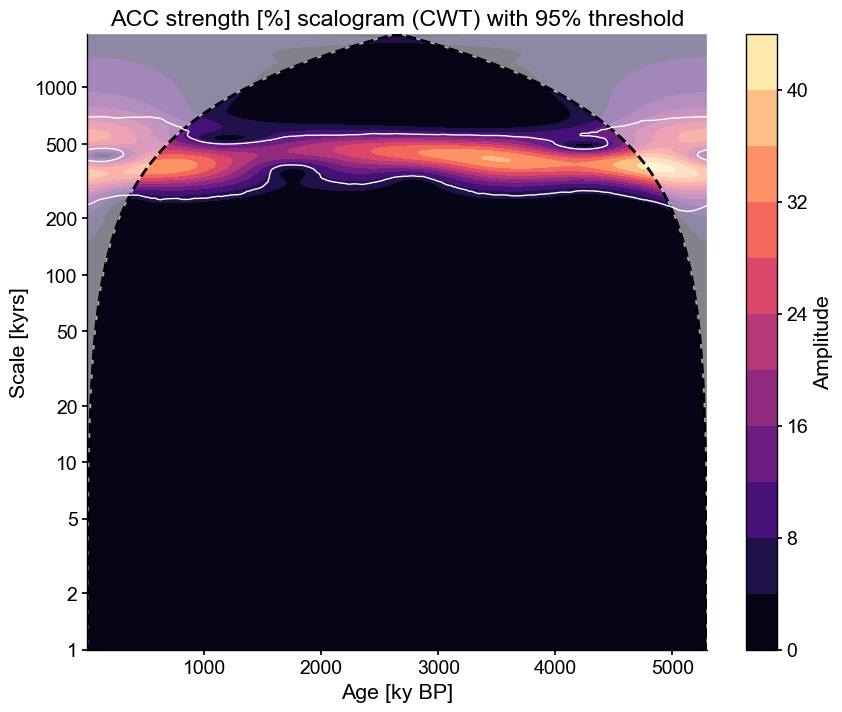

In [146]:

#Wavelet Analysis of ACC Strength (filtered for 413kyr cyclicity)
acc_ts.gaussianize().filter(cutoff_scale=(390,420),method='firwin').wavelet().signif_test().plot()

In [150]:
#Filter timeseries for 413kyr cyclicity

#ACC Strength
acc_filter_ts = acc_ts.gaussianize().filter(cutoff_scale=(390,420),method='firwin')

#Antarctic Ice Vol
ice_filter_ts = ice_ts.gaussianize().filter(cutoff_scale=(390,420),method='firwin')

#Asian Monsoon
monsoon_filter_ts = monsoon_ts.gaussianize().interp().filter(cutoff_scale=(390,420),method='firwin')

#lro4
lro4_filter_ts = lro4.gaussianize().interp().filter(cutoff_scale=(390,420),method='firwin')

#d13c

d13c_filter_ts = d13c.interp().filter(cutoff_scale=(390,420),method='firwin')

#ecc
ecc_filter_ts = ecc_ts.filter(cutoff_scale=(390,420),method='firwin')


filtering with windown hamming
filtering with windown hamming
filtering with windown hamming
filtering with windown hamming
filtering with windown hamming
filtering with windown hamming


The two series have different lengths, left: 2115 vs right: 10600
Metadata are different:
value_unit property -- left: ‰, right: %
value_name property -- left: $\delta^{18} \mathrm{O}$, right: ACC strength
label property -- left: LR04 benthic stack, right: ACC strength [%]
archiveType property -- left: MarineSediment, right: None
The two series have values differing by more than 1e-05 %
The two series have different lengths, left: 2115 vs right: 53001
Metadata are different:
value_unit property -- left: ‰, right: None
value_name property -- left: $\delta^{18} \mathrm{O}$, right: AIS Vol
label property -- left: LR04 benthic stack, right: AIS Volume
archiveType property -- left: MarineSediment, right: None
The two series have different lengths, left: 10600 vs right: 53001
Metadata are different:
value_unit property -- left: %, right: None
value_name property -- left: ACC strength, right: AIS Vol
label property -- left: ACC strength [%], right: AIS Volume
The two series have different len

(<Figure size 800x1200 with 8 Axes>,
 {0: <Axes: ylabel='$\\delta^{18} \\mathrm{O}$ [‰]'>,
  1: <Axes: ylabel='ACC strength [%]'>,
  2: <Axes: ylabel='ACC strength [%]'>,
  3: <Axes: ylabel='AIS Vol'>,
  4: <Axes: ylabel='Asian Monsoon'>,
  5: <Axes: ylabel='$\\delta^{13} \\mathrm{C}$ [‰ VPDB]'>,
  6: <Axes: ylabel='Eccentricity'>,
  'x_axis': <Axes: xlabel='Age [ka]'>})

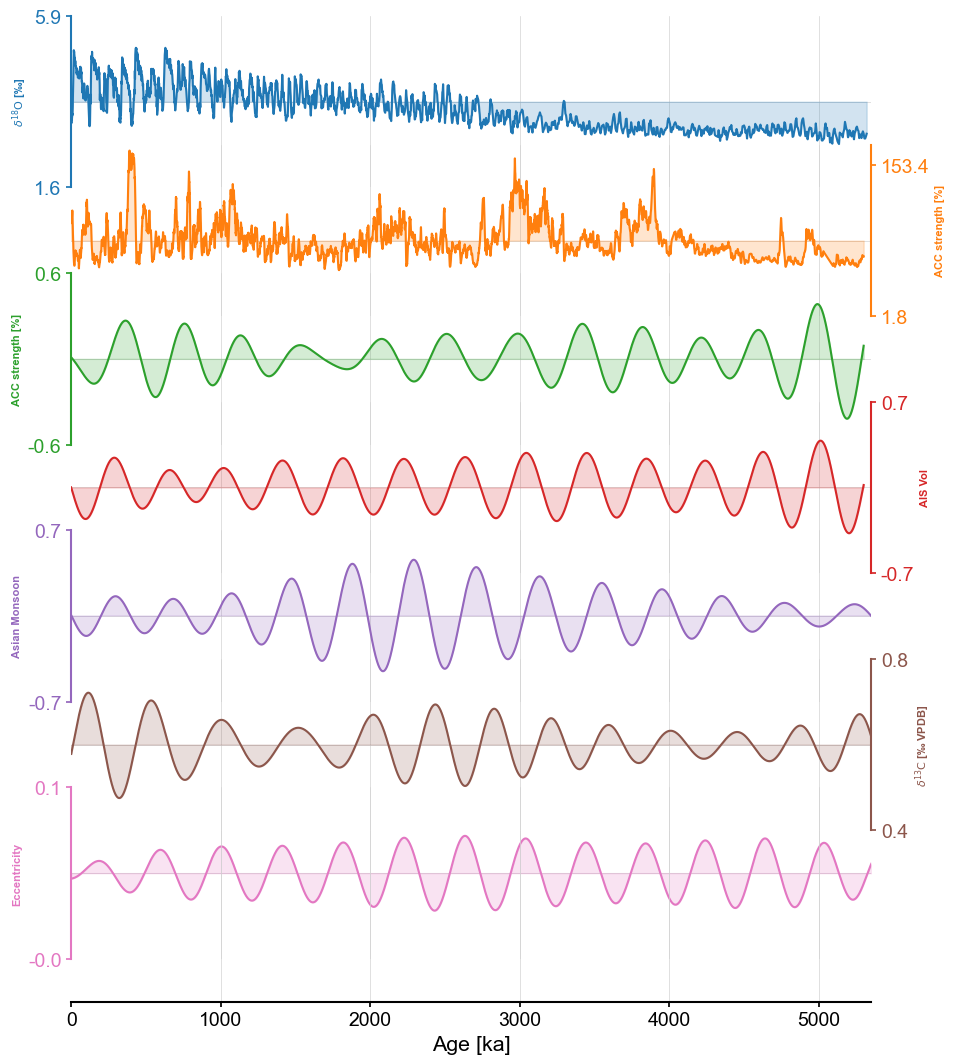

In [157]:

#Create a stackplot
stack = lro4 & acc_ts & acc_filter_ts & ice_filter_ts & monsoon_filter_ts & d13c_filter_ts & ecc_filter_ts
stack.stackplot(labels=None, xlim=(0,5350), figsize=(8,12))